In [1]:
import numpy as np
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pathlib
import h5py

In [2]:
cases = ['first','first_rescale', 'second', 
         'second_2.5d']


In [3]:
data = {}
for case in cases:
    file = case + '/scalars/scalars_s1.h5'
    f = h5py.File(file, 'r')
    t = f['scales/sim_time'][:]
    data_slice = (slice(None),0,0)
    data[case] = {}
    data[case]['t'] = t
    for key in f['tasks']:
        data[case][key] = f['tasks/'+key][data_slice]
    f.close()

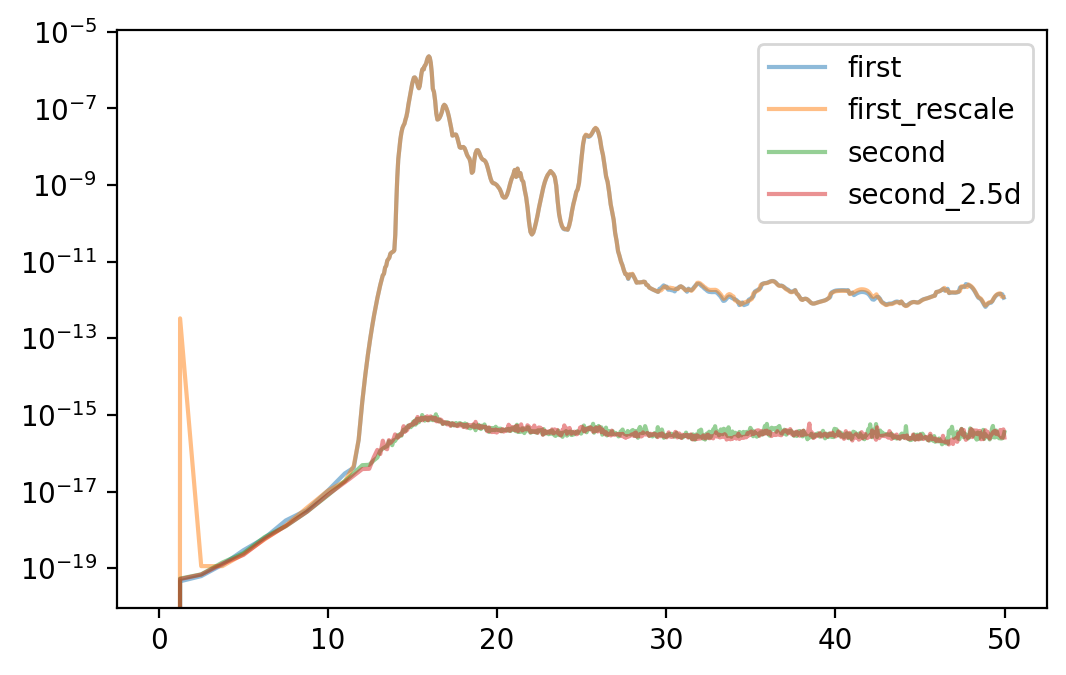

In [4]:
fig, ax = plt.subplots(figsize=[6,6/1.6])
for case in cases:
    ax.plot(data[case]['t'], data[case]['|div_u|'], alpha=0.5, label=case)
ax.set_yscale('log')
ax.legend()

In [5]:
keys = ['|div_u|']
for key in keys:
    print(key)
    for case in cases:
        print(f"     {case:10s}, " \
              f"{np.min(data[case][key]):10.2e}, " \
              f"{np.mean(data[case][key]):10.2e}, " \
              f"{np.max(data[case][key]):10.2e}")

|div_u|
     first     ,   0.00e+00,   5.86e-08,   2.29e-06
     first_rescale,   0.00e+00,   5.85e-08,   2.29e-06
     second    ,   0.00e+00,   3.77e-16,   1.04e-15
     second_2.5d,   0.00e+00,   3.66e-16,   9.25e-16


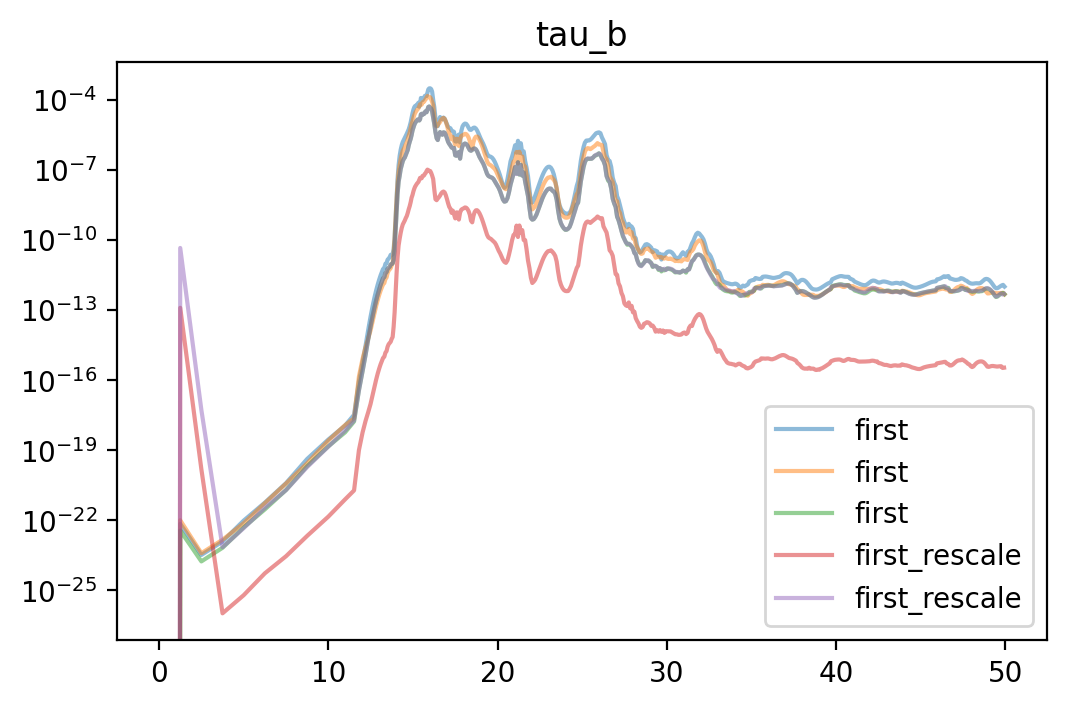

In [6]:
fig, ax = plt.subplots(figsize=[6,6/1.6])
for case in cases[0:2]:
    for key in data[case].keys():
        if 'tau_b' in key:
            ax.plot(data[case]['t'], data[case][key], alpha=0.5, label=case)
ax.set_yscale('log')
ax.set_title('tau_b')
ax.legend()

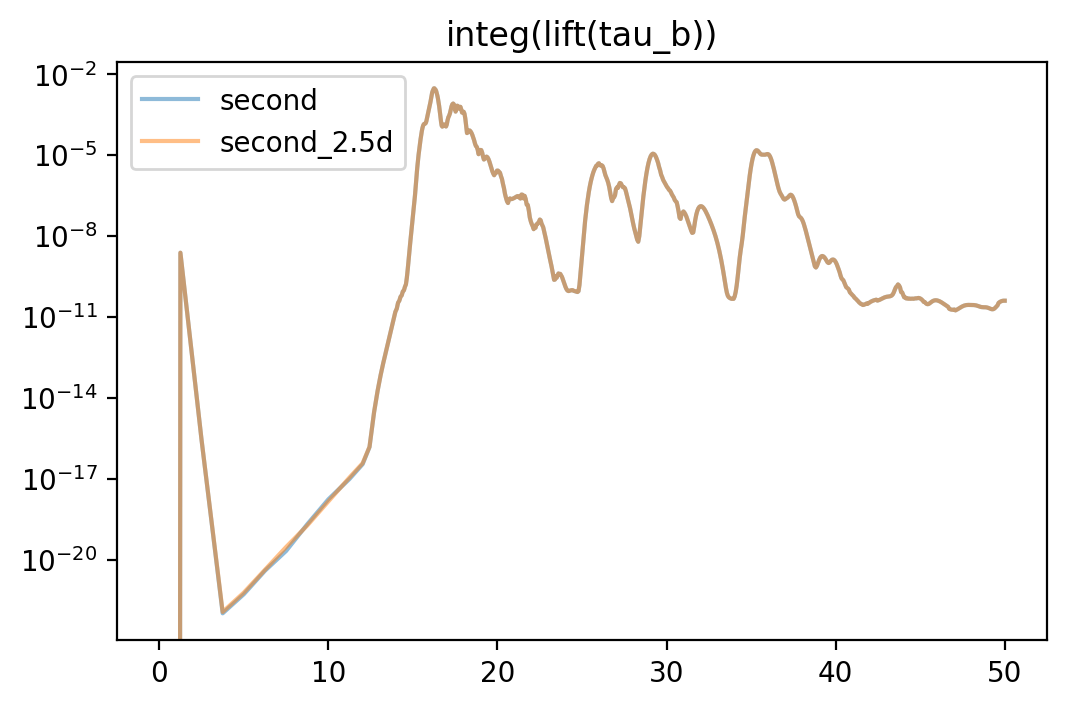

In [7]:
fig, ax = plt.subplots(figsize=[6,6/1.6])
for case in cases[2:]:
    for key in data[case].keys():
        if 'tau_b' in key:
            ax.plot(data[case]['t'], data[case][key], alpha=0.5, label=case)
ax.set_yscale('log')
ax.set_title('integ(lift(tau_b))')
ax.legend()